In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from math import sqrt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("model_data.csv")

In [2]:
# Separate Features from Labels
# For Features I get all columns except the last one
X = data.iloc[:, :-1].values

# For features I can about the Risk Score which is the last column
y = data.iloc[:, -1].values

In [3]:
# Encoding Categorical Values
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[9])] , remainder ='passthrough' )
X = np.array(ct.fit_transform(X))

In [4]:
# Test - Train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [5]:
# Scale the data to ensure uniformity in the Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Model Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make Predictions
y_pred = regressor.predict(X_test)

In [8]:
# Show the values Vertically not Horizontally
np.set_printoptions(precision = 2)
print("Predictions VS Real Results")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))


Predictions VS Real Results
[[43.84 34.4 ]
 [52.77 53.  ]
 [56.55 60.  ]
 ...
 [50.12 57.  ]
 [50.66 52.  ]
 [38.36 32.  ]]


In [38]:
# Show the results
results = pd.DataFrame({
    'Actual RiskScore': y_test,
    'Predicted RiskScore': y_pred
})

print(results.head())

   Actual RiskScore  Predicted RiskScore
0              34.4            43.839152
1              53.0            52.772369
2              60.0            56.554160
3              49.0            51.857723
4              47.0            37.745585


# Evaluation Metrics

# R2 Squared
It is also known as the coefficient of determination. This metric gives an indication of how good a model fits a given dataset. It indicates how close the regression line (i.e the predicted values plotted) is to the actual data values. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.

In [9]:
# R2 Squared
scores = cross_val_score(LinearRegression(), X, y,scoring='r2')
print("The R-squared is:", scores)
# The model does not fit the given data - low score

The R-squared is: [0.44 0.46 0.43 0.4  0.41]


# Mean Absolut Error
Mean Absolute Error(MAE) is the mean size of the mistakes in collected predictions. We know that an error basically is the absolute difference between the actual or true values and the values that are predicted. The absolute difference means that if the result has a negative sign, it is ignored.

Hence, MAE = True values – Predicted values

MAE takes the average of this error from every sample in a dataset and gives the output.

In [10]:
error = mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error is :", error)
print(f"{error} indicates that, on average, the model's predictions for the RiskScore deviate from the actual values by {error} units.")

The Mean Absolute Error is : 4.615360093815341
4.615360093815341 indicates that, on average, the model's predictions for the RiskScore deviate from the actual values by 4.615360093815341 units.


# Mean Squared Error
The Mean Absolute Error is the squared mean of the difference between the actual values and predictable values.
How do you Calculate MSE?

# Steps to calculate the MSE from a set of X and Y values:

1. First, Find the regression line.
2. Insert the X values into the linear regression equation to find the new Y values (Y’).
3. Subtract the new Y value from the original to get the error.
4. Square the values that you go as errors.
5. Add up the errors
6. Find the mean.


In [15]:
error_mse = mean_squared_error(y_test, y_pred)
print("The mean Squared error is", error)
print(f"The difference between the predicted and actual values is {error_mse}")
# It means now that we have high MSE that the points are dispersed widely around its central moment

The mean Squared error is 33.1224888716431
The difference between the predicted and actual values is 33.1224888716431


# Root Mean Squared Error
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model.

In [18]:
root_mean_squared_error = sqrt(error_mse)
print("The root mean squared error is", root_mean_squared_error)
print(f"A Root Mean Squared Error (RMSE) of {root_mean_squared_error}  means that, on average, the predictions deviate from the actual values by {root_mean_squared_error} units on the same scale as the target variable.")

The root mean squared error is 5.755214059584848
A Root Mean Squared Error (RMSE) of 5.755214059584848  means that, on average, the predictions deviate from the actual values by 5.755214059584848 units on the same scale as the target variable.


# Feature Importance Analysis

['encoder__x9_Employed' 'encoder__x9_Self-Employed'
 'encoder__x9_Unemployed' 'remainder__x0' 'remainder__x1' 'remainder__x2'
 'remainder__x3' 'remainder__x4' 'remainder__x5' 'remainder__x6'
 'remainder__x7' 'remainder__x8']


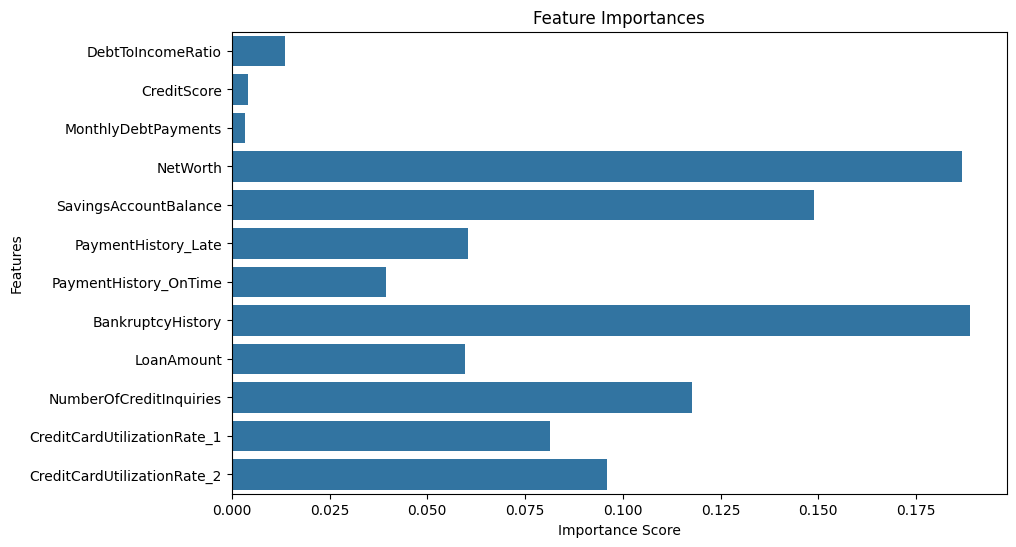

In [ ]:
# Feature Importance Analysis

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

if hasattr(ct, 'get_feature_names_out'):  # If using ColumnTransformer
    feature_names_expanded = ct.get_feature_names_out()
else:
    feature_names_expanded = [f'Feature_{i}' for i in range(X_train.shape[1])]
print(feature_names_expanded)

feature_names_updated = ['DebtToIncomeRatio', 'CreditScore', 'MonthlyDebtPayments', 
                         'NetWorth', 'SavingsAccountBalance', 'PaymentHistory_Late', 
                         'PaymentHistory_OnTime', 'BankruptcyHistory', 'LoanAmount', 
                         'NumberOfCreditInquiries', 'CreditCardUtilizationRate_1', 
                         'CreditCardUtilizationRate_2']


plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_names_updated)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [36]:
# Accuracy Test
# Cross validation 3 because 10 is very heavy
#Incorporating cross-validation ensures the model generalizes well and avoids overfitting.
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 3)
print(accuracies)

[0.42 0.43 0.43]


 # Visualizing Results

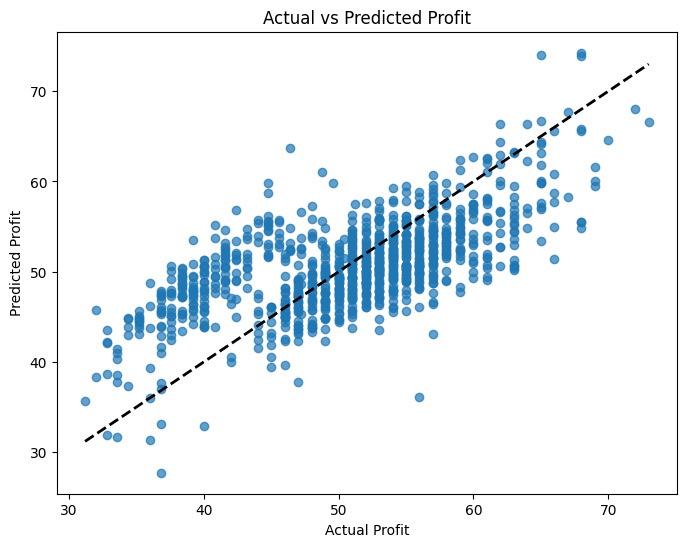

In [12]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()

# HyperParameter Tuning
Lasso and Ridge regularization techniques

#### Why Use a Pipeline?
Ensures consistent preprocessing (e.g., scaling) for both training and test splits.

#### Why Scale Features?
Regularization in Ridge and Lasso penalizes coefficients, which can be sensitive to feature magnitudes.


In [41]:
# Hyperparameter grid
from sklearn.pipeline import Pipeline

# Ridge Parameters Pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# lasso pipeline
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Ridge Hyperparameter grid
ridge_param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'ridge__fit_intercept': [True, False]
}

#Lasso Hyperparameter Grid
lasso_param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'lasso__fit_intercept': [True, False]
}

# Grid search for Ridge
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=2, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Grid search for Lasso
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Print the best parameters and score for Ridge
print("Best Parameters for Ridge:", ridge_grid_search.best_params_)
print("Best Score for Ridge:", -ridge_grid_search.best_score_)

# Print the best parameters and score for Lasso
print("Best Parameters for Lasso:", lasso_grid_search.best_params_)
print("Best Score for Lasso:", -lasso_grid_search.best_score_)




Best Parameters for Ridge: {'ridge__alpha': 10, 'ridge__fit_intercept': True}
Best Score for Ridge: 33.853527828610744
Best Parameters for Lasso: {'lasso__alpha': 0.01, 'lasso__fit_intercept': True}
Best Score for Lasso: 33.66286872590466
